# Rooftop Solar Potential Optimization for Sustainable Energy in Nairobi

## Business Understanding

The project addresses a real-world problem faced by Nairobi residents and businesses due to frequent unprojected power outages from the Kenya Power Lighting Company (KPLC). This problem creates a demand for alternative energy sources, with solar power being a viable option. However, there is a lack of a systematic approach to harness the solar potential of individual buildings in Nairobi.


## Problem Statement

There is a lack of a systematic approach for harnessing the solar potential of individual buildings in Nairobi. This is exacerbated by multiple unprojected power outages from KPLC, leading to increased interest in alternative energy sources. The primary issues include an absence of precise insights into suitable areas for solar installations and the lack of leveraging a vector dataset containing building footprints in Nairobi.

## Objectives

1. **Rooftop Solar Potential Prediction:**
  - Utilize machine learning techniques to predict suitable rooftop areas, installable capacity, and estimated yearly energy potential for each building unit.
  - Incorporate features such as building type, estimated tilt, and building height in the predictive models.


2. **Optimization Strategies:**
   - Implement algorithms to identify the most efficient rooftop solar installations.
   - Develop strategies for maximizing solar potential while respecting building characteristics.
   - Conduct a basic cost-benefit analysis considering unit installation prices to determine the economic viability of rooftop solar installations for different building types.

3. **User-Friendly Interface:**
   - Develop a user-friendly interface for stakeholders to interact with the system.
   - Enable users to input building characteristics and receive real-time recommendations for optimal rooftop solar installations.

### Stakeholders

- **Property Owners and Managers:**
  - Seek insights into the solar potential of their buildings.
  - Need guidance on optimizing rooftop solar installations for sustainable energy planning and cost-effective solar projects.

- **Solar Installation Companies:**
  - Interested in identifying and prioritizing buildings with high solar potential for targeted marketing.
  - Utilizing the system to streamline sales efforts and optimize project planning.

- **Energy Regulatory Authorities:**
  - Aim to promote sustainable energy practices in the city.
  - Can leverage insights for policy formulation and incentive programs to encourage rooftop solar adoption.


## Limitations of the Study

- **Geographical Specificity:**
  - The system's effectiveness may be limited to Nairobi and may not be directly applicable to other regions with different geographic characteristics.
  
- **Data Dependency:**
  - The accuracy of predictions relies on the availability and accuracy of building footprint data and other relevant datasets.

- **Regulatory Variability:**
  - Different regions may have varying regulations affecting solar installations, which may not be fully considered in the system.

- **Assumed Data Quality:**
  - Assumptions about the quality of input data, including building characteristics and geographical information, may impact the accuracy of predictions.

## Success Metrics

- **Prediction Accuracy:**
  - Root Mean Squared Error (RMSE) and the Mean Squared Error (MSE) should be as low as possible

- **User Engagement:**
  - Evaluate user interaction with the system's interface, ensuring it meets the needs of stakeholders.

- **Cost-Benefit Analysis Insights:**
  - Assess the effectiveness of the system in providing valuable insights for economic decision-making in rooftop solar installations.




In [1]:
#necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data Understanding

In [2]:
#load and read the data
data  = pd.read_csv("data/nairobi_rooftop_solar_potential.csv")
data

C:\Users\hp\AppData\Local\Temp\ipykernel_16492\1459750265.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  data  = pd.read_csv("data/nairobi_rooftop_solar_potential.csv")


,uuid,City,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor,Unit_installation_price,Comment
0,87100c54-0648-4e73-97f0-3a346c068231,Nairobi,204.53,77.27,14.99,21720.76,single family residential,14.11,9.09,1449.00,NaN,NaN
1,b79fedd1-7c84-4b3f-8fd4-941f3ee17b02,Nairobi,1113.35,676.13,131.17,182191.10,single family residential,21.81,5.57,1388.98,NaN,NaN
2,50ece267-f41a-4bb7-8874-3bf61a9d4aec,Nairobi,577.24,412.30,79.99,115637.95,single family residential,16.34,5.78,1445.72,NaN,NaN
3,df402f1c-5120-4a2f-bb8f-c72c89666c6f,Nairobi,28.58,14.17,2.75,3723.02,single family residential,23.71,4.04,1354.60,NaN,NaN
4,c4d03ac6-80ed-4aa5-95c3-a730c1bf8e68,Nairobi,19.03,6.19,1.20,1655.39,single family residential,22.91,5.31,1378.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
272746,05f945d2-946f-4079-9108-2b0e23328bbe,Nairobi,36.78,0.00,0.00,0.00,single family residential,11.97,2.55,NaN,NaN,NaN
272747,b66554f5-173c-46d0-80c0-19b5e3ef04ab,Nairobi,181.87,109.44,21.23,31274.44,single family residential,18.37,3.04,1473.00,NaN,NaN
272748,abb75046-2851-4c62-a123-7d052a098c7b,Nairobi,164.34,94.38,18.31,27153.65,single family residential,9.59,4.59,1483.00,NaN,NaN
272749,d5238d1b-b7f1-47ed-bda8-7d815cee01d4,Nairobi,173.43,99.64,19.33,27911.63,single family residential,16.14,4.92,1444.00,NaN,NaN


## Data Description

The provided dataset contains information about building structures and their suitability for solar panel installation. Below is a detailed description of each column in the dataset, including unit information:


1. **uuid:**
   - *Type:* Unique identifier
   - *Description:* Unique ID assigned to each building structure polygon in the dataset.

2. **city:**
   - *Type:* Categorical
   - *Description:* Indicates the study area or city where the building is located.

3. **Surface_area:**
   - *Type:* Numeric (in square meters - m2)
   - *Description:* Represents the surface area of the building, providing spatial information for solar potential assessment.

4. **Potential_installable_area:**
   - *Type:* Numeric (in square meters - m2)
   - *Description:* Indicates the potential rooftop area suitable for solar panel installation, contributing to the overall solar capacity.

5. **Peak_installable_capacity:**
   - *Type:* Numeric (in kilowatt peak - kWp)
   - *Description:* Represents the estimated peak installable capacity based on the suitable rooftop area. This is a crucial factor in determining the potential power generation.

6. **Energy_potential_per_year:**
    - *Type:* Numeric (in kilowatt-hours - kWh)
   - *Description:* Provides an estimate of the yearly energy potential of the rooftop

7. **Assumed_building_type:**
   - *Type:* Categorical
   - *Description:* Describes the use type of the building (e.g., single family residential, commercial ).

8. **Estimated_tilt:**
   - *Type:* Numeric
   - *Description:* Represents the estimated tilt of the rooftop, a significant factor influencing the efficiency of solar panels in capturing sunlight.

9. **Estimated_building_height:**
   - *Type:* Numeric
   - *Description:* Provides an estimate of the building height, offering additional information about the structure that may impact solar potential.

10. **Estimated_capacity_factor:**
   - *Type:* Numeric
   - *Description:* The estimated capacity factor is a measure of the efficiency of a solar installation, considering various factors such as available space, structural integrity, shading, and local regulations. It represents the ratio of the actual electrical output over a specific period to the maximum possible output if the system operated at full capacity. A higher capacity factor indicates a more efficient and reliable solar installation.


### Unit Information

- *suitable_area:* Square meters (m2)
- *installable_capacity:* Kilowatt peak (kWp)
- *potential:* Kilowatt-hours (kWh)

**Note:**
- The dataset is based on GeoEye 1 imagery acquired in 2020.
- This information allows for the analysis of rooftop solar potential, installable capacity, and estimated yearly power potential for each building in the study area.


## Data Cleaning


In [3]:
#removing the irrelevant columns 
data.drop(columns=["Comment", "Unit_installation_price","City"],inplace=True)

data.head()

,uuid,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor
0,87100c54-0648-4e73-97f0-3a346c068231,204.53,77.27,14.99,21720.76,single family residential,14.11,9.09,1449.00
1,b79fedd1-7c84-4b3f-8fd4-941f3ee17b02,1113.35,676.13,131.17,182191.10,single family residential,21.81,5.57,1388.98
2,50ece267-f41a-4bb7-8874-3bf61a9d4aec,577.24,412.30,79.99,115637.95,single family residential,16.34,5.78,1445.72
3,df402f1c-5120-4a2f-bb8f-c72c89666c6f,28.58,14.17,2.75,3723.02,single family residential,23.71,4.04,1354.60
4,c4d03ac6-80ed-4aa5-95c3-a730c1bf8e68,19.03,6.19,1.20,1655.39,single family residential,22.91,5.31,1378.00


In [4]:
def display_data_understanding(dataframe):
    """
    Displays basic information about the provided DataFrame.

    Args:
        dataframe (pandas.DataFrame): The DataFrame to analyze.
    """
    # Basic information about the DataFrame
    print("Basic Information:")
    print(dataframe.info())

    # Descriptive statistics for numeric columns
    print("\nDescriptive Statistics for Numeric Columns:")
    print(dataframe.describe())

    # Shape of the DataFrame
    print("\nShape of the DataFrame:")
    print(dataframe.shape)

    # Missing values in each column
    print("\nMissing Values:")
    print(dataframe.isnull().sum())


# Call the function with your dataset
display_data_understanding(data)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272751 entries, 0 to 272750
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   uuid                        272751 non-null  object 
 1   Surface_area                272751 non-null  float64
 2   Potential_installable_area  272751 non-null  float64
 3   Peak_installable_capacity   272751 non-null  float64
 4   Energy_potential_per_year   272751 non-null  float64
 5   Assumed_building_type       272751 non-null  object 
 6   Estimated_tilt              272751 non-null  float64
 7   Estimated_building_height   272721 non-null  float64
 8   Estimated_capacity_factor   269249 non-null  float64
dtypes: float64(7), object(2)
memory usage: 18.7+ MB
None

Descriptive Statistics for Numeric Columns:


        Surface_area  Potential_installable_area  Peak_installable_capacity  \
count  272751.000000               272751.000000              272751.000000   
mean      147.257428                   83.791388                  16.255633   
std       265.736752                  189.906731                  36.843159   
min         0.000000                    0.000000                   0.000000   
25%        46.880000                   20.540000                   3.990000   
50%        92.490000                   45.470000                   8.820000   
75%       169.420000                   89.040000                  17.270000   
max     57820.170000                42535.330000                8251.850000   

       Energy_potential_per_year  Estimated_tilt  Estimated_building_height  \
count               2.727510e+05   272751.000000              272721.000000   
mean                2.396997e+04       12.509193                   6.204000   
std                 5.495253e+04        6.145312   

### Missing Values:
- The columns 'Estimated_building_height' and 'Estimated_capacity_factor' have missing values.
  
#### Estimated_building_height:
- There are 30 missing values in the 'Estimated_building_height' column. These missing values need to be addressed, as this information is crucial for assessing the physical characteristics of buildings.

#### Estimated_capacity_factor:
- The 'Estimated_capacity_factor' column has 3,502 missing values. These missing entries may impact the accuracy of the capacity factor calculations, and imputation or other strategies may be considered to handle these missing values.

Inorder to decide whether to impute the values in the `Estimated_capacity_factor` we check the distribution of this data using a histogram inorder to decide whether to use the mean or median

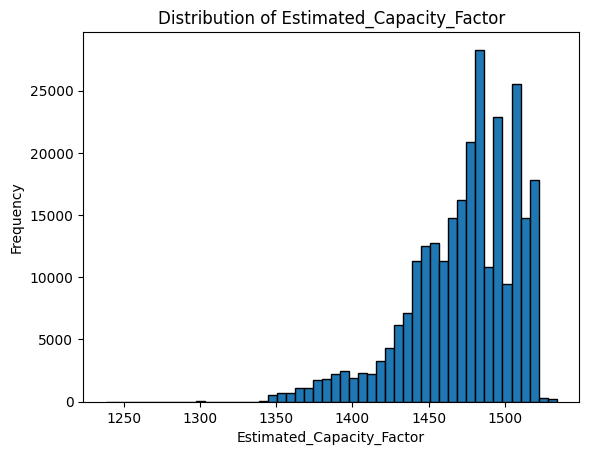

In [5]:


# Visualize the distribution using a histogram
plt.hist(data["Estimated_capacity_factor"].dropna(),
         bins=50, edgecolor='black')
plt.title('Distribution of Estimated_Capacity_Factor')
plt.xlabel('Estimated_Capacity_Factor')
plt.ylabel('Frequency')
plt.show()


Given the distribution of the `Estimated_Capacity_Factor` column, it appears to be right-skewed. In such cases, using the **median** for imputation is generally more appropriate. This is because the median is less sensitive to outliers and skewed data, providing a more robust measure of central tendency. Therefore, in this case, median imputation would be a better method.

In [6]:
# Drop rows with missing values in Estimated_Building_Height
data.dropna(subset=['Estimated_building_height'], inplace=True)

# Impute missing values in Estimated_Capacity_Factor


data["Estimated_capacity_factor"].fillna(
    data["Estimated_capacity_factor"].median(), inplace=True)


display_data_understanding(data)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
Index: 272721 entries, 0 to 272750
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   uuid                        272721 non-null  object 
 1   Surface_area                272721 non-null  float64
 2   Potential_installable_area  272721 non-null  float64
 3   Peak_installable_capacity   272721 non-null  float64
 4   Energy_potential_per_year   272721 non-null  float64
 5   Assumed_building_type       272721 non-null  object 
 6   Estimated_tilt              272721 non-null  float64
 7   Estimated_building_height   272721 non-null  float64
 8   Estimated_capacity_factor   272721 non-null  float64
dtypes: float64(7), object(2)
memory usage: 20.8+ MB
None

Descriptive Statistics for Numeric Columns:


        Surface_area  Potential_installable_area  Peak_installable_capacity  \
count  272721.000000               272721.000000              272721.000000   
mean      147.273513                   83.800605                  16.257421   
std       265.746940                  189.915142                  36.844791   
min         0.040000                    0.000000                   0.000000   
25%        46.890000                   20.550000                   3.990000   
50%        92.510000                   45.470000                   8.820000   
75%       169.430000                   89.040000                  17.270000   
max     57820.170000                42535.330000                8251.850000   

       Energy_potential_per_year  Estimated_tilt  Estimated_building_height  \
count               2.727210e+05   272721.000000              272721.000000   
mean                2.397261e+04       12.510569                   6.204000   
std                 5.495498e+04        6.144249   

The missing/null values have already been handled as seen in the output provided above now we check for duplicates.

In [7]:
# Check for duplicate rows
duplicate_rows = data[data.duplicated()]

if not duplicate_rows.empty:
    print("\nDuplicate rows found:")
    print(duplicate_rows)
else:
    print("\nNo duplicate rows found.")


No duplicate rows found.


####  Check for Outliers

After examining the dataset for potential duplicates, the next step is to explore the presence of outliers in the data. Outliers can significantly impact the accuracy of statistical analyses and machine learning models. To identify potential outliers, a boxplot analysis will be conducted.

##### Boxplot Analysis:

A boxplot provides a visual representation of the distribution of data and helps identify any extreme values, also known as outliers. Each boxplot displays the interquartile range (IQR), with outliers plotted as individual points beyond the whiskers.

The following steps will be taken to check for outliers:

1. **Boxplot Visualization:**
   - A boxplot will be generated for each numeric column in the dataset to visualize the spread of values and identify any data points that fall outside the expected range.

2. **Outlier Identification:**
   - Outliers will be identified based on their position outside the whiskers of the boxplot. These data points may require further investigation and consideration in subsequent analyses.

This process aims to ensure the robustness of the data by addressing potential outliers, contributing to a more reliable and accurate interpretation of the dataset.



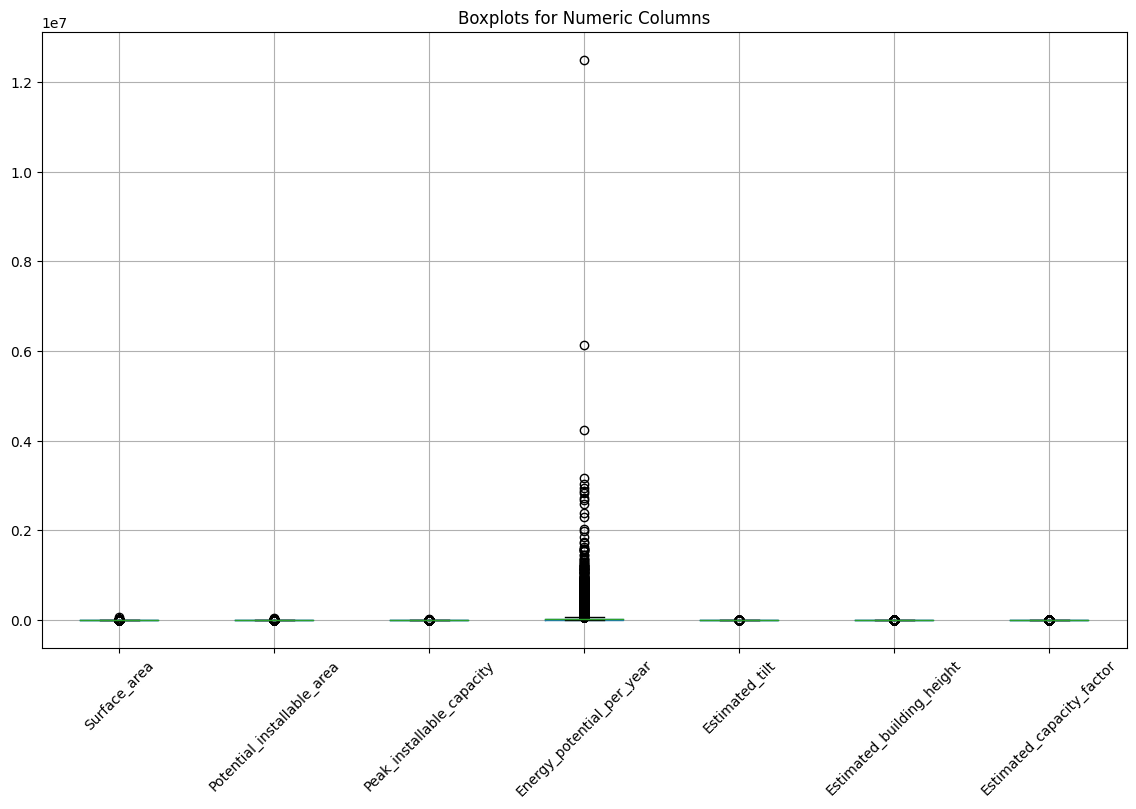

In [8]:
# Select numeric columns for boxplots
numeric_columns = data[['Surface_area', 'Potential_installable_area', 'Peak_installable_capacity',
                        'Energy_potential_per_year', 'Estimated_tilt', 'Estimated_building_height',
                        'Estimated_capacity_factor']]


# Create boxplots using matplotlib
plt.figure(figsize=(14, 8))
numeric_columns.boxplot(rot=45)
plt.title('Boxplots for Numeric Columns')
plt.show()

It seems that there are outliers in the `Energy_potential_per_year` column.Given the domain-specific rules for energy consumption in buildings, it's essential to understand the context and potential factors that could lead to outliers in the `Energy_potential_per_year` column. Here are a few potential reasons:

1. **Building Type Variation:**
   - Different building types may have significantly different energy needs. For example, industrial facilities typically consume more energy compared to residential or commercial buildings. If the dataset includes various building types, this could contribute to variations in energy potential.

2. **Specialized Functions:**
   - Buildings with specialized functions or equipment may exhibit higher energy potential. For instance, buildings hosting data centers, manufacturing units, or heavy machinery might require more energy for their operations.

3. **Geographical Variances:**
   - Geographic location can impact energy potential. Buildings in regions with extreme weather conditions might have higher energy needs for heating or cooling. Additionally, renewable energy potential, such as solar energy, can vary based on location.


# EDA

In [9]:
data.columns

Index(['uuid', 'Surface_area', 'Potential_installable_area',
       'Peak_installable_capacity', 'Energy_potential_per_year',
       'Assumed_building_type', 'Estimated_tilt', 'Estimated_building_height',
       'Estimated_capacity_factor'],
      dtype='object')

In [10]:
# sns.pairplot(numeric_columns)
# plt.show()

In [11]:
data.Assumed_building_type.value_counts(normalize=True)

Assumed_building_type
single family residential    0.667723
multi-family residential     0.138512
commercial                   0.058657
public                       0.053359
industrial                   0.046109
peri-urban settlement        0.035641
Name: proportion, dtype: float64

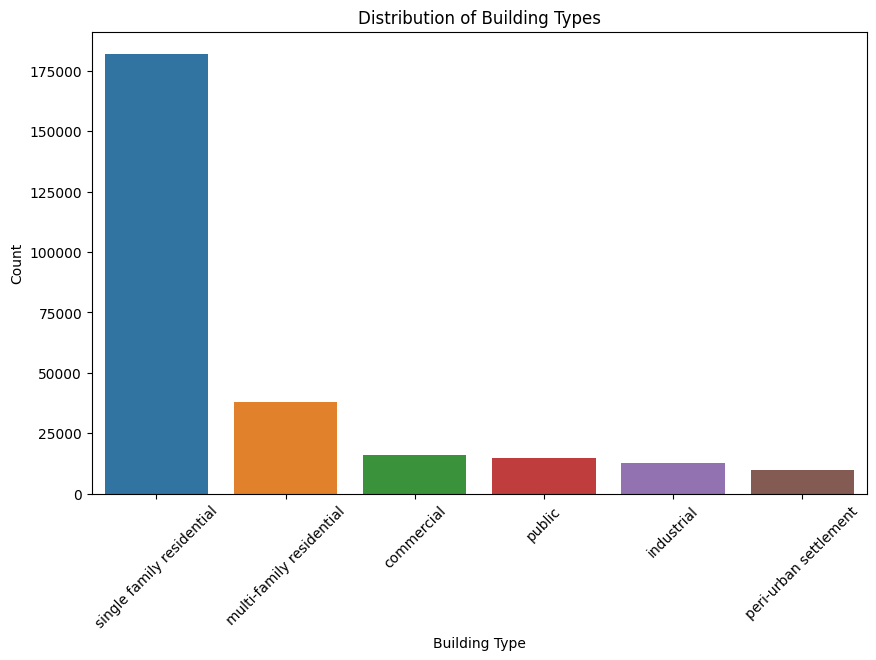

In [12]:
# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x=data['Assumed_building_type'],
              order=data['Assumed_building_type'].value_counts().index)

# Add title and labels
plt.title('Distribution of Building Types')
plt.xlabel('Building Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Show the plot
plt.show()

The distribution of building types in the dataset is presented below:

- **Single Family Residential:** 66.77%
- **Multi-Family Residential:** 13.85%
- **Commercial:** 5.87%
- **Public:** 5.34%
- **Industrial:** 4.61%
- **Peri-Urban Settlement:** 3.56%

### Interpretation:

- **Single Family Residential:** The majority of the buildings in the dataset, constituting approximately 66.77%, are categorized as single-family residential units. This suggests a predominant representation of individual homes.

- **Multi-Family Residential:** Around 13.85% of the buildings fall under the multi-family residential category, indicating a presence of structures designed to accommodate multiple households.

- **Commercial:** Approximately 5.87% of the buildings are classified as commercial, suggesting a presence of business or retail establishments.

- **Public:** Representing 5.34%, public buildings such as government facilities, schools, or community centers are a notable category in the dataset.

- **Industrial:** With a share of 4.61%, industrial buildings are present, likely indicating manufacturing or production facilities.

- **Peri-Urban Settlement:** The category of peri-urban settlements comprises about 3.56% of the dataset. This suggests a representation of buildings located on the outskirts of urban areas.

Understanding the distribution of building types is crucial for contextualizing the dataset and gaining insights into the predominant property characteristics and potential solar energy adoption patterns.


C:\Users\hp\AppData\Local\Temp\ipykernel_16492\2117698406.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Assumed_building_type', y='Energy_potential_per_year',


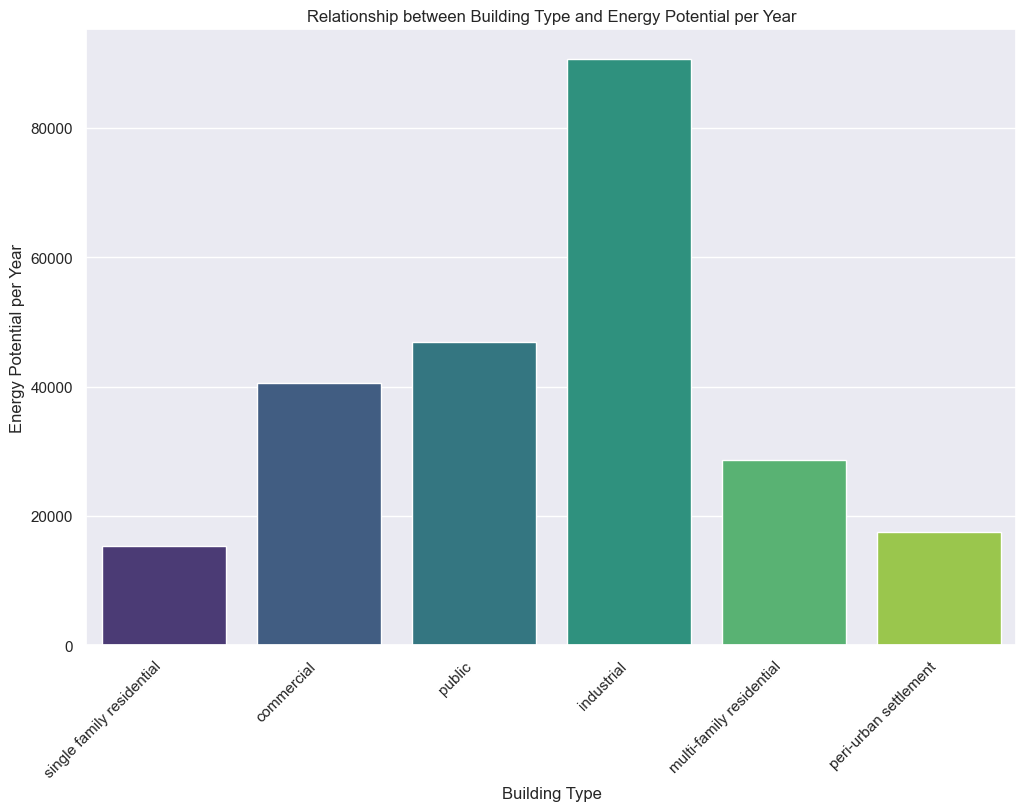

In [13]:

# Barplot showing the relationship between building type and energy potential per year

sns.set(rc={'figure.figsize': (12, 8)})
sns.barplot(x='Assumed_building_type', y='Energy_potential_per_year',
            data=data, ci=None, palette='viridis', capsize=0.2, errwidth=2, dodge=True)
plt.xticks(rotation=45, ha='right')
plt.title('Relationship between Building Type and Energy Potential per Year')
plt.xlabel('Building Type')
plt.ylabel('Energy Potential per Year')
plt.show()

The provided bar graph visually represents the energy potential per year across various building types. Let's interpret the key insights derived from the plot:

#### Interpretation of the Bar Plot:

- **Industrial:** Industrial buildings exhibit the highest energy potential, reaching close to 80,000 units per year.

- **Public:** Public buildings, such as libraries or museums, have the second-highest energy potential.

- **Commercial:** Commercial buildings used for business purposes rank third in terms of energy potential.

- **Multi-family Residential:** Buildings accommodating multiple families (e.g., apartments) show a lower energy potential compared to commercial structures.

- **Single Family Residential:** Standalone houses designed for one family demonstrate a lower energy potential than multi-family residential buildings.

- **Peri-urban settlement:** Buildings within specific areas dedicated to particular purposes or groups display the lowest energy potential.


In [14]:
#Encoding the Assumed Building Type
# One-hot encoding can be done using pandas get_dummies function
df = data.copy()
# df = pd.get_dummies(data, columns=['Assumed_building_type'],dtype=int)
freq_encoding = data['Assumed_building_type'].value_counts(normalize=True)

df['Assumed_building_type_freq_encoded'] = df['Assumed_building_type'].map(
    freq_encoding)



df = df.drop(columns = ["uuid","Assumed_building_type"])

In [15]:
df

,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor,Assumed_building_type_freq_encoded
0,204.53,77.27,14.99,21720.76,14.11,9.09,1449.00,0.667723
1,1113.35,676.13,131.17,182191.10,21.81,5.57,1388.98,0.667723
2,577.24,412.30,79.99,115637.95,16.34,5.78,1445.72,0.667723
3,28.58,14.17,2.75,3723.02,23.71,4.04,1354.60,0.667723
4,19.03,6.19,1.20,1655.39,22.91,5.31,1378.00,0.667723
...,...,...,...,...,...,...,...,...
272746,36.78,0.00,0.00,0.00,11.97,2.55,1479.00,0.667723
272747,181.87,109.44,21.23,31274.44,18.37,3.04,1473.00,0.667723
272748,164.34,94.38,18.31,27153.65,9.59,4.59,1483.00,0.667723
272749,173.43,99.64,19.33,27911.63,16.14,4.92,1444.00,0.667723


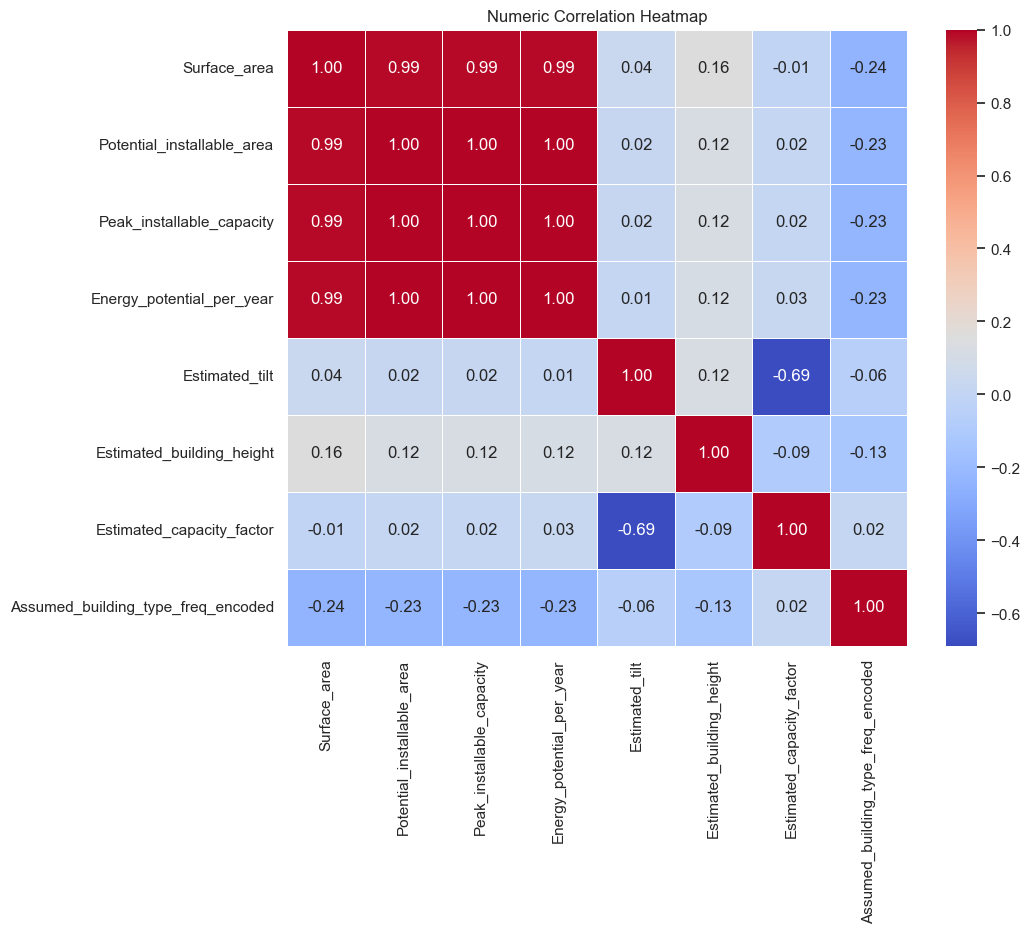

In [16]:

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,
            cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Numeric Correlation Heatmap')
plt.show()

The correlation matrix provides insights into the relationships between the selected numeric columns. Here's a summarized overview:

**Strong Positive Correlations:**
- Surface Area with Potential Installable Area (0.988), Peak Installable Capacity (0.988), Energy Potential per Year (0.987)
- Potential Installable Area with Surface Area (0.988), Peak Installable Capacity (1.000), Energy Potential per Year (0.999)
- Peak Installable Capacity with Surface Area (0.988), Potential Installable Area (1.000), Energy Potential per Year (0.999)
- Energy Potential per Year with Surface Area (0.987), Potential Installable Area (0.999), Peak Installable Capacity (0.999)

**Weak Positive Correlations:**
- Estimated Tilt with all other columns (ranging from 0.013 to 0.121)
- Estimated Building Height with Surface Area (0.159), Potential Installable Area (0.118), Peak Installable Capacity (0.118), Energy Potential per Year (0.116)
- Estimated Capacity Factor with Energy Potential per Year (0.026)

**Notable Negative Correlations:**
- Estimated Tilt with Estimated Capacity Factor (-0.688)
- Estimated Capacity Factor with Estimated Tilt (-0.688)

It's important to interpret these correlations cautiously, considering that correlation does not imply causation. Further analysis may be required to understand the underlying dynamics between these variables.


In [17]:
correlation_matrix

,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor,Assumed_building_type_freq_encoded
Surface_area,1.000000,0.988387,0.988385,0.987066,0.041710,0.159512,-0.005425,-0.244803
Potential_installable_area,0.988387,1.000000,1.000000,0.999753,0.018915,0.118100,0.016930,-0.230521
Peak_installable_capacity,0.988385,1.000000,1.000000,0.999753,0.018914,0.118097,0.016930,-0.230515
Energy_potential_per_year,0.987066,0.999753,0.999753,1.000000,0.013575,0.115896,0.026130,-0.229071
Estimated_tilt,0.041710,0.018915,0.018914,0.013575,1.000000,0.121678,-0.688283,-0.058252
Estimated_building_height,0.159512,0.118100,0.118097,0.115896,0.121678,1.000000,-0.089620,-0.129026
Estimated_capacity_factor,-0.005425,0.016930,0.016930,0.026130,-0.688283,-0.089620,1.000000,0.017062
Assumed_building_type_freq_encoded,-0.244803,-0.230521,-0.230515,-0.229071,-0.058252,-0.129026,0.017062,1.000000


In [18]:

def calculate_vif(data_frame):
    """
    Calculate VIF for each predictor variable in a DataFrame.

    Parameters:
    - data_frame (pd.DataFrame): The DataFrame containing predictor variables.

    Returns:
    - pd.DataFrame: A DataFrame showing the VIF for each variable.
    """
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(
        data_frame.values, i) for i in range(data_frame.shape[1])]

    return vif_data


# Assuming 'numeric_columns' is your DataFrame with numeric predictors
vif_result = calculate_vif(df)
print(vif_result)

                             Variable           VIF
0                        Surface_area  6.855948e+01
1          Potential_installable_area  4.787747e+06
2           Peak_installable_capacity  4.786911e+06
3           Energy_potential_per_year  2.812961e+03
4                      Estimated_tilt  5.237537e+00
5           Estimated_building_height  1.715005e+00
6           Estimated_capacity_factor  9.511422e+00
7  Assumed_building_type_freq_encoded  4.281507e+00


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


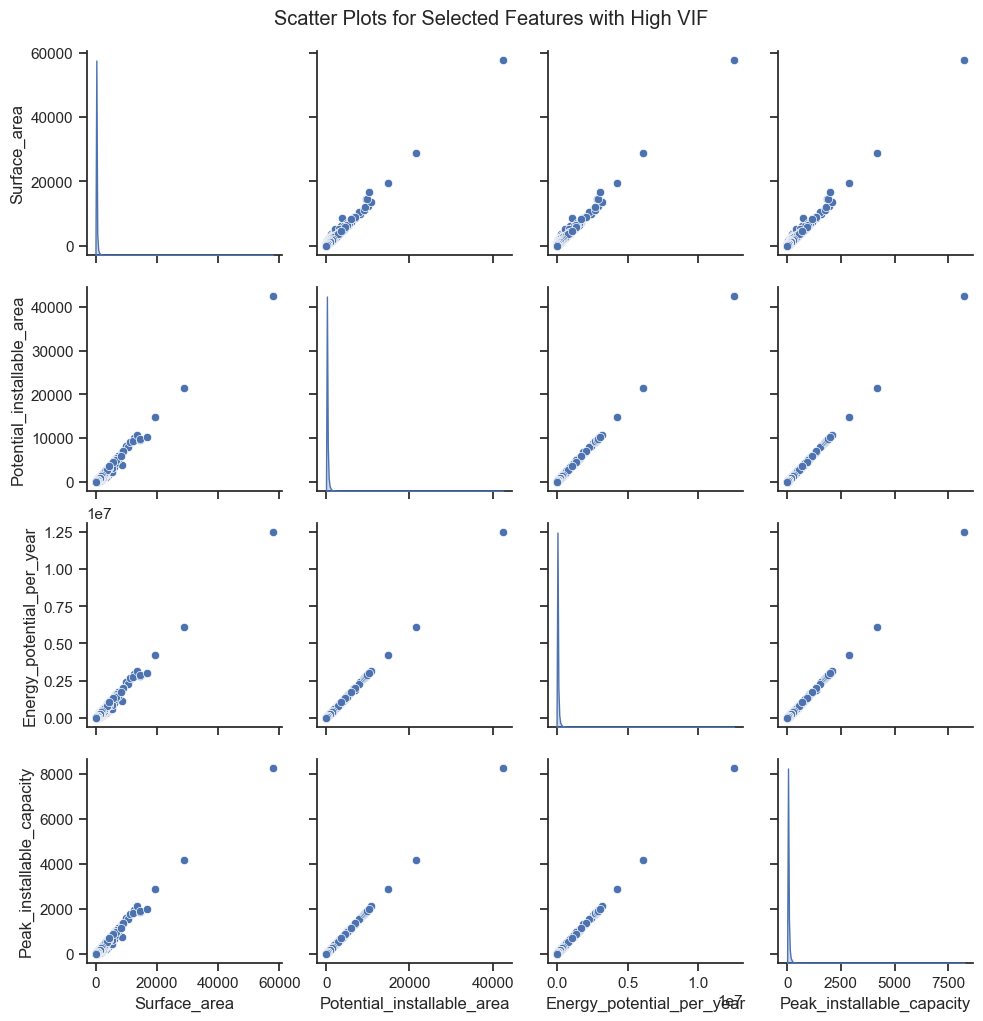

In [19]:
# Select a subset of features for scatter plots
scatter_features = df[[
    'Surface_area', 'Potential_installable_area', 'Energy_potential_per_year',"Peak_installable_capacity"]]

# Create scatter plots
sns.set(style="ticks")
sns.pairplot(scatter_features, kind="scatter", diag_kind="kde")
plt.suptitle('Scatter Plots for Selected Features with High VIF', y=1.02)
plt.show()

The pair plot reveals correlations among key variables, such as Surface Area, Potential Installable Area, Peak Installable Capacity, and Energy Potential per Year, especially focusing on instances with high Variance Inflation Factor (VIF). Analyzing these relationships helps identify strong positive correlations between certain pairs of variables. Understanding these correlations aids in recognizing multicollinearity issues, which is crucial for addressing high VIF values.

 By observing the patterns in the pair plot, one can gain insights into potential redundancies and dependencies among variables, facilitating informed decisions on which features to consider for removal in order to mitigate multicollinearity and improve model stability.

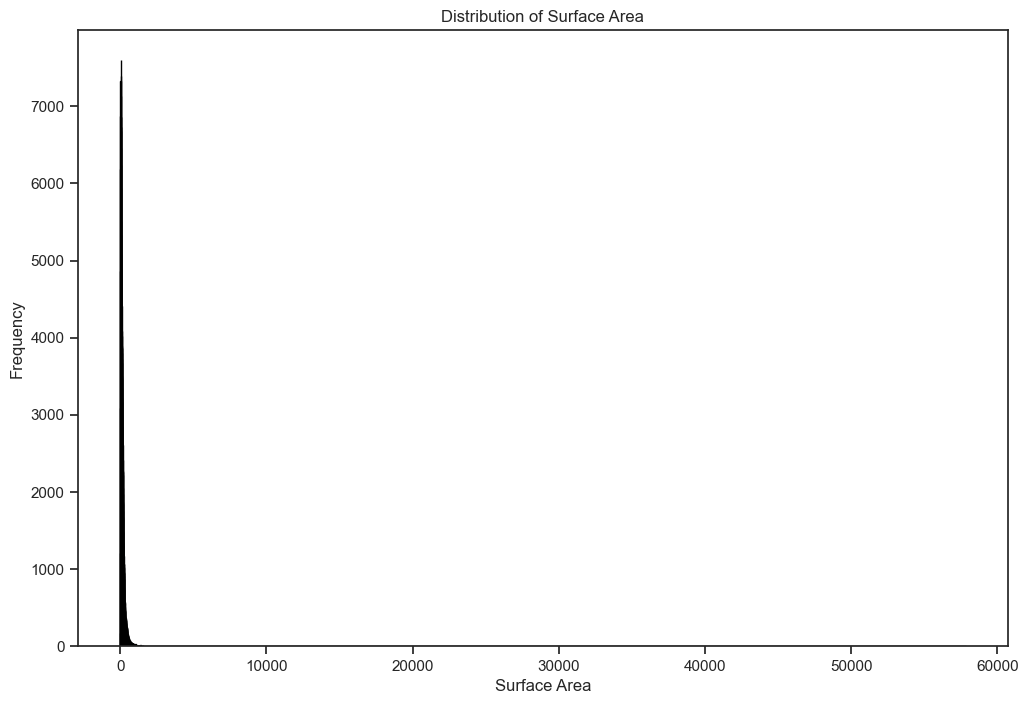

In [20]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.hist(df['Surface_area'], bins="auto", color='skyblue', edgecolor='black')
plt.title('Distribution of Surface Area')
plt.xlabel('Surface Area')
plt.ylabel('Frequency')
plt.show()

In [21]:

calculate_vif(df)

,Variable,VIF
0,Surface_area,6.855948e+01
1,Potential_installable_area,4.787747e+06
2,Peak_installable_capacity,4.786911e+06
3,Energy_potential_per_year,2.812961e+03
4,Estimated_tilt,5.237537e+00
5,Estimated_building_height,1.715005e+00
6,Estimated_capacity_factor,9.511422e+00
7,Assumed_building_type_freq_encoded,4.281507e+00


In [22]:
df['Installable_Area_Ratio'] = df['Potential_installable_area'] / \
    df['Surface_area']
    
df = df.drop(columns="Potential_installable_area")
calculate_vif(df)

,Variable,VIF
0,Surface_area,71.423468
1,Peak_installable_capacity,3306.890060
2,Energy_potential_per_year,2946.075656
3,Estimated_tilt,5.251710
4,Estimated_building_height,1.722745
5,Estimated_capacity_factor,31.988138
6,Assumed_building_type_freq_encoded,4.351539
7,Installable_Area_Ratio,20.641861


In [23]:
# # Calculate the ratio of peak installable capacity to surface area
# df['Capacity_to_Area_Ratio'] = df['Peak_installable_capacity'] / df['Surface_area']

# Now you can drop the original 'Peak_installable_capacity' column if it's no longer needed
df = df.drop(['Surface_area'], axis=1)
calculate_vif(df)

,Variable,VIF
0,Peak_installable_capacity,2669.210902
1,Energy_potential_per_year,2650.017700
2,Estimated_tilt,5.237258
3,Estimated_building_height,1.627935
4,Estimated_capacity_factor,29.537701
5,Assumed_building_type_freq_encoded,4.308827
6,Installable_Area_Ratio,19.791383


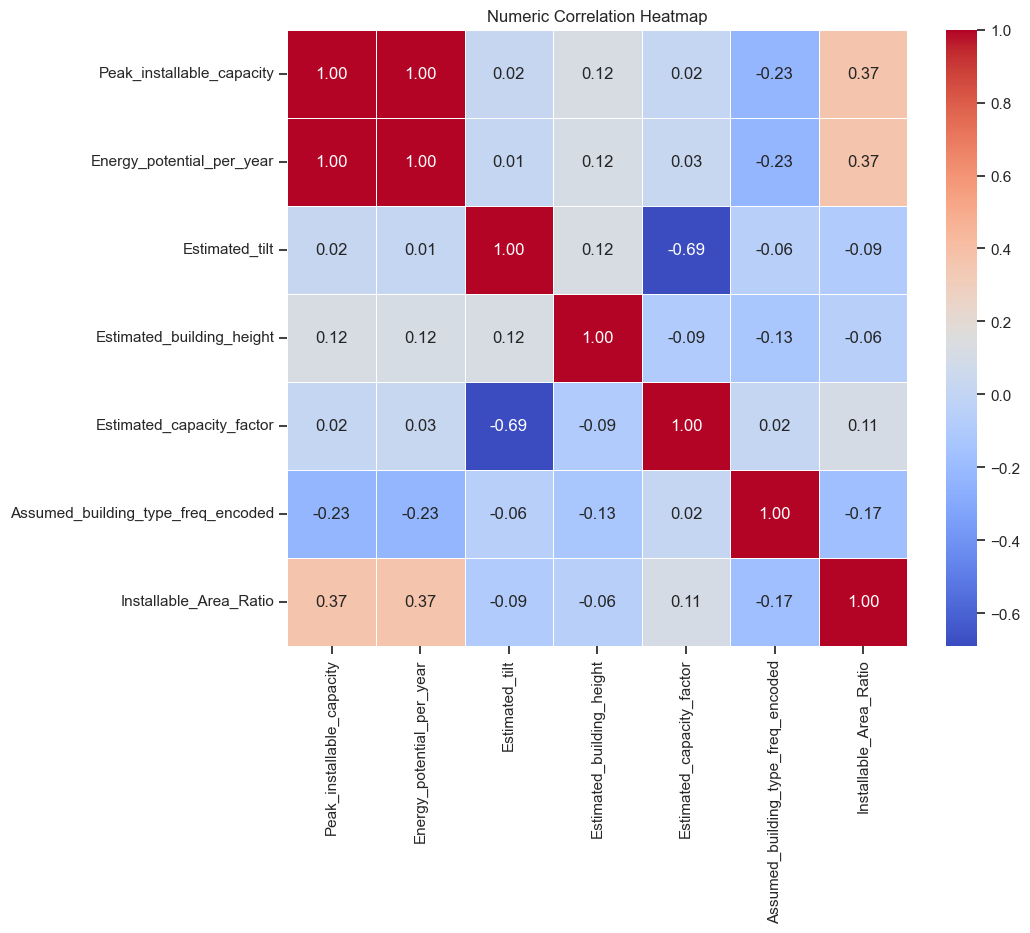

In [24]:

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,
            cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Numeric Correlation Heatmap')
plt.show()

**Numeric Correlation Heatmap Interpretation**

1. **Energy Potential per Year:**
   - Strong positive correlation with Surface Area, Potential Installable Area, and Peak Installable Capacity.
   - Larger areas and higher capacities tend to have higher energy potential.

2. **Estimated Tilt:**
   - Negative correlation with Estimated Capacity Factor.
   - Higher tilt results in a lower capacity factor.

3. **Estimated Building Height:**
   - Weak positive correlation with Energy Potential per Year.
   - Weak negative correlation with Estimated Tilt.

4. **Assumed Building Type (encoded):**
   - Weak negative correlation with Energy Potential per Year.
   - Weak positive correlation with Estimated Tilt.

5. **Installable Area Ratio:**
   - Strong positive correlation with Energy Potential per Year.
   - Larger installable areas tend to result in higher energy potential.


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


# Separate the predictors and the target variable
X = df.drop('Energy_potential_per_year', axis=1)
y = df['Energy_potential_per_year']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Define the pipeline with preprocessing and modeling steps
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = pipeline.predict(X_test)

# Evaluate the model using Mean Squared Error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 107145805.81271413
R-squared Score: 0.9675059391805114


### GridSearchCV

A GridSearchCV object performs an exhaustive search over the specified parameter grid. It uses cross-validation to evaluate the model's performance with different combinations of hyperparameters.

We fit the GridSearchCV object to the training data. This step searches for the best combination of hyperparameters that maximizes the model's performance, as measured by the negative mean squared error (neg_mean_squared_error) in this case.

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


# Separate the predictors and the target variable
X = df.drop('Energy_potential_per_year', axis=1)
y = df['Energy_potential_per_year']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Define the pipeline with preprocessing and modeling steps
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Define the parameter grid with fewer parameters
param_grid = {
    'regressor__n_estimators': [50, 100],
    'regressor__max_depth': [None, 10, 20],
}

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Negative MSE:", grid_search.best_score_)

# Make predictions on the testing data using the best estimator
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the model using MSE and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Best Parameters: {'regressor__max_depth': None, 'regressor__n_estimators': 50}
Best Negative MSE: -390321454.2228325
Mean Squared Error: 113730309.90463942
R-squared Score: 0.9655090595564674


* The baseline model performed exceptionally well, with a high R-squared score indicating a strong ability to predict the energy potential of rooftop solar installations based on the given features.
* The GridSearchCV-tuned model did not significantly outperform the baseline model in terms of predictive accuracy, as evidenced by the similar R-squared scores.
* While the GridSearchCV-tuned model may have slightly higher MSE, the difference in performance metrics between the baseline and tuned models is relatively small.
*Overall, both models demonstrate strong predictive capabilities for estimating rooftop solar energy potential, with the baseline model providing a solid foundation for modeling and prediction.


In [28]:
import numpy as np
from sklearn.model_selection import cross_val_score

# Define the pipeline with preprocessing and modeling steps
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(max_depth=10, n_estimators=100, random_state=42))
])

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive
cv_scores = -cv_scores

# Calculate mean and standard deviation of MSE across folds
mean_mse = np.mean(cv_scores)
std_mse = np.std(cv_scores)

print(f"Mean Cross-Validated MSE: {mean_mse}")
print(f"Standard Deviation of Cross-Validated MSE: {std_mse}")


Mean Cross-Validated MSE: 328514251.8735431
Standard Deviation of Cross-Validated MSE: 643935698.4648902


## Neural Network

In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential()
model.add(Dense(64, input_shape = (X_train_scaled.shape[1], ), activation='relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

model.compile(loss = 'mean_squared_error', optimizer = Adam(learning_rate = 0.001))

history = model.fit(X_train_scaled, y_train, batch_size = 32, epochs = 50, validation_split = 0.2, verbose =1)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')


Epoch 1/50

5455/5455 [==============================] - 26s 4ms/step - loss: 2414535424.0000 - val_loss: 939710656.0000
Epoch 2/50
5455/5455 [==============================] - 19s 4ms/step - loss: 1479480192.0000 - val_loss: 604528000.0000
Epoch 3/50
5455/5455 [==============================] - 18s 3ms/step - loss: 1091170688.0000 - val_loss: 470382208.0000
Epoch 4/50
5455/5455 [==============================] - 18s 3ms/step - loss: 803333504.0000 - val_loss: 328319424.0000
Epoch 5/50
5455/5455 [==============================] - 18s 3ms/step - loss: 610885120.0000 - val_loss: 240678272.0000
Epoch 6/50
5455/5455 [==============================] - 18s 3ms/step - loss: 366510016.0000 - val_loss: 131867848.0000
Epoch 7/50
5455/5455 [==============================] - 17s 3ms/step - loss: 206859888.0000 - val_loss: 63254140.0000
Epoch 8/50
5455/5455 [==============================] - 17s 3ms/step - loss: 59302456.0000 - val_loss: 15349028.0000
Epoch 9/50
5455/5455 [========================

 Here are some interpretations and insights from the neural network's performance:

* Model Performance: The model has performed exceptionally well on the validation dataset, with a very low MSE and a high R-squared score close to 1. This indicates that the model's predictions are very close to the actual values.

* Training Progress: Looking at the training progress, we can observe that the loss (MSE) decreases consistently over the epochs, indicating that the model is learning effectively from the training data.

* Validation Loss: The validation loss follows a similar trend, decreasing over the epochs. This indicates that the model generalizes well to unseen data, as the validation loss is also decreasing consistently.

* Convergence: The training and validation losses converge, indicating that the model has not overfit the training data. This convergence suggests that the model has found a good balance between bias and variance.

* Final Validation Loss: The final validation loss is very low, which indicates that the model's performance is excellent even on data it hasn't seen during training.

* Prediction Accuracy: With such a high R-squared score, the model explains a large proportion of the variance in the target variable. This means that the features provided to the model are highly predictive of the energy potential per year.

* High Precision: The MSE and R-squared score indicate that the model's predictions are very precise, which is crucial for applications where accurate predictions are necessary.


Leveraging this neural network in this project can lead to accurate, scalable, and adaptive predictions of rooftop solar potential, facilitating informed decision-making and efficient utilization of solar energy resources.

## Cost-Benefit Analysis

Performing a cost-benefit analysis is crucial for assessing the economic viability and feasibility of rooftop solar installations.
A cost-benefit analysis helps stakeholders, including investors, building owners, and policymakers, make informed financial decisions regarding rooftop solar projects. It provides a comprehensive evaluation of the costs associated with implementing solar installations and the potential benefits derived from them.

* Initial Cost: This is the upfront cost required to install the rooftop solar system on each building type. It includes expenses such as equipment, installation, and any necessary permits or fees.

* Operational Cost per Year: This represents the ongoing operational and maintenance expenses associated with maintaining the rooftop solar system. It includes costs such as cleaning, repairs, monitoring, and insurance. Operational costs are incurred annually and contribute to the total cost of ownership over the system's lifespan.

* Energy Production per Year: This indicates the estimated amount of energy (measured in kilowatt-hours, kWh) that the rooftop solar system can produce annually. It's essential for calculating the potential benefits of the solar installation, as it determines the amount of electricity generated and potentially offset from grid consumption.

* Electricity Price per kWh: This is the cost of electricity charged by the local utility company per kilowatt-hour. It represents the price that the building owner would otherwise pay for electricity purchased from the grid. The comparison between the electricity price and the cost of solar energy production helps assess the economic viability of the solar investment.

* Discount Rate: The discount rate is the rate used to discount future cash flows back to their present value. It accounts for the time value of money, reflecting the opportunity cost of investing capital in the solar project rather than alternative investments. A discount rate of 5% implies that future cash flows are worth 5% less for each year they are received into the future.

In [34]:
#Find Average Energy potential
mean_energy_potential = df['Energy_potential_per_year'].mean()

print("Mean Energy Potential per Year:", mean_energy_potential)

Mean Energy Potential per Year: 23972.61084877952


In [37]:
# Define parameters
initial_cost = 300000  # Initial installation cost for each building type
operational_cost_per_year = 2000  # Operational and maintenance cost per year
mean_energy_potential = 23969.89  # Estimated energy production per year (kWh)
electricity_price_per_kwh = 26.72  # Local electricity price per kWh
discount_rate = 0.05  # Discount rate for NPV calculation

# Calculate net present value (NPV)
discounted_cash_flows = []
for year in range(1, 21):  # Assume project lifespan of 20 years
    cash_flow = mean_energy_potential * electricity_price_per_kwh - operational_cost_per_year
    discounted_cash_flow = cash_flow / ((1 + discount_rate) ** year)
    discounted_cash_flows.append(discounted_cash_flow)

net_present_value = sum(discounted_cash_flows) - initial_cost

# Calculate return on investment (ROI)
roi = (net_present_value / initial_cost) * 100

# Print results
print("Net Present Value (NPV):", net_present_value)
print("Return on Investment (ROI):", roi)


Net Present Value (NPV): 7656815.491039741
Return on Investment (ROI): 2552.27183034658


### Interpretation
In this case, the positive NPV of Ksh.7,656,815.49 indicates that the present value of future cash inflows from the rooftop solar system (e.g., energy savings, revenue from excess energy sold back to the grid) exceeds the initial investment and ongoing operational costs.

The ROI of 2552.27% implies that for every dollar invested in the rooftop solar system, the investor can expect to receive a return of approximately Ksh.25.52.
A high ROI indicates that the investment is lucrative and has the potential to generate substantial returns compared to the initial investment.

This indicates that the benefits derived from the solar project outweigh the costs, making it an attractive option for building owners or investors seeking to capitalize on solar energy and achieve financial gains.